# What are the Digital Humanities

A few lines of code to explore the dataset used by the [What is Digital Humanities](https://whatisdigitalhumanities.com/). The website randomly loads one of 817 definitions collected from participants from the Day of DH between 2009-2014.

We load the definitions stored in a [CSV file](https://github.com/hepplerj/whatisdigitalhumanities/blob/master/dayofquotes_full.csv) downloaded from the GitHub repository of the project. We count the words and we use a simple visualization (a word cloud) to explore the vocabulary.

## Load the data

In [25]:
import csv

with open('../data/dayofquotes_full.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    lines = [r for r in csvreader]


In [26]:
lines[1]

['The thoughtful use of computing in humanistic inquiry and the thinking through of computing from the perspective of the traditions of the humanities.',
 'Geoffrey Rockwell',
 '2012-01-01']

In [27]:
definitions = '\n'.join([l[0] for l in lines[1:]]).lower()

In [28]:
definitions[:40]

'the thoughtful use of computing in human'

## Get rid of the most frequent words (stopwords)

In [29]:
with open('../data/en-stopwords.txt') as f:
    stops = [w.strip('\n') for w in f.readlines()]

In [30]:
stops[-5:]

["you've", 'your', 'yours', 'yourself', 'yourselves']

However, it's not enough to get rid of frequent words like 'that' or 'of'. Since we're dealing with a list of definitions of Digital Humanities, I expect the phrase "Digital Humanities" and the acronym "DH" to be quite frequent, but not very informative (we *know* that this texts talk about DH!). At the same time I'd like to keep the separate words `digital` and `humanities` too...

How do we do that?

In [31]:
stops += ['digital', 'humanities', 'dh']

## Create the wordclouds

We need a library to be able to do that...

In [21]:
!pip install wordcloud pip matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stops).generate(definitions)

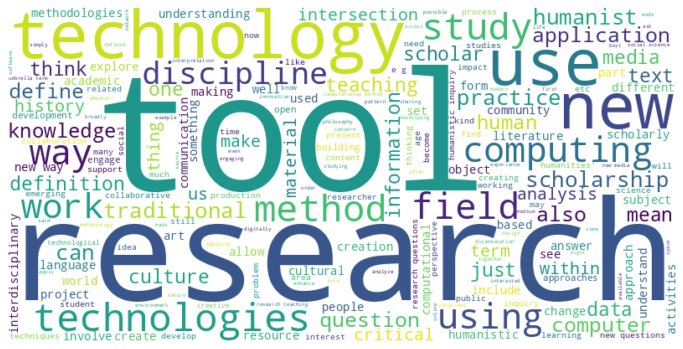

In [41]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()